In [1]:
#Developing neocortex
import scanpy as sc
import matplotlib.pyplot as plt
from pathlib import Path

/home/mmiihkin/miniconda3/envs/scanpy311/lib/python3.11/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
# Zuckerberg collection
file_path = Path.home() / "Downloads" / "7b582c37-37ad-49d2-a369-06f38289031e.h5ad"

# Load the AnnData object
adata = sc.read_h5ad(file_path)

In [3]:
adata.obs.columns

Index(['Sample_ID', 'Estimated_postconceptional_age_in_days', 'Group',
       'Region', 'nCount_RNA', 'nFeature_RNA', 'ATAC_fragments_in_peaks',
       'Percentage_reads_in_peaks', 'TSS.enrichment', 'Nucleosome_signal',
       'Scrublet_doublet_score', 'S.Score', 'G2M.Score', 'Class', 'Subclass',
       'Type', 'Type_updated', 'Cluster', 'tissue_ontology_term_id',
       'tissue_type', 'assay_ontology_term_id', 'disease_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'cell_type', 'assay',
       'disease', 'sex', 'tissue', 'self_reported_ethnicity',
       'development_stage', 'observation_joinid'],
      dtype='object')

In [ ]:
#Save cell type abundances into an xlsx

import pandas as pd

# df = ...  # your dataframe already loaded

label_col = "cell_type"   # change to "pred.subclass_label" if you want predicted labels

# Count cells per subclass (drop missing)
counts = (
    adata.obs[label_col]
    .dropna()
    .astype(str)
    .value_counts()
    .rename_axis("cell_type")
    .reset_index(name="Count")
)

# Save to Excel
out_path = "Zuckerberg neocortex Subclass abundances.xlsx"
counts.to_excel(out_path, index=False)

print(f"Saved {len(counts)} subclasses to: {out_path}")

Saved 29 subclasses to: Zuckerberg neocortex Subclass abundances.xlsx


In [ ]:
import anndata as ad

print(type(adata))
print(adata)
print(adata.obsm.keys())
print(adata.layers.keys())

adata.obs["Region"]


<class 'anndata._core.anndata.AnnData'>
AnnData object with n_obs × n_vars = 232328 × 35477
    obs: 'Sample_ID', 'Estimated_postconceptional_age_in_days', 'Group', 'Region', 'nCount_RNA', 'nFeature_RNA', 'ATAC_fragments_in_peaks', 'Percentage_reads_in_peaks', 'TSS.enrichment', 'Nucleosome_signal', 'Scrublet_doublet_score', 'S.Score', 'G2M.Score', 'Class', 'Subclass', 'Type', 'Type_updated', 'Cluster', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'Type_colors', 'Type_updated_colors', 'citation', 

ARKFrozen-18-PFC_AAACAGCCAAGGTGCA-1    PFC
ARKFrozen-18-PFC_AAACAGCCAATTGAAG-1    PFC
ARKFrozen-18-PFC_AAACAGCCACTAAATC-1    PFC
ARKFrozen-18-PFC_AAACAGCCAGGTTCAC-1    PFC
ARKFrozen-18-PFC_AAACAGCCATCCATCT-1    PFC
                                      ... 
NIH-M2837-BA10-2_TTTGTGTTCATGAAGG-1    PFC
NIH-M2837-BA10-2_TTTGTGTTCATTACAG-1    PFC
NIH-M2837-BA10-2_TTTGTGTTCCCATAAA-1    PFC
NIH-M2837-BA10-2_TTTGTGTTCGCTAAGT-1    PFC
NIH-M2837-BA10-2_TTTGTTGGTTTAGTCC-1    PFC
Name: Region, Length: 232328, dtype: category
Categories (3, object): ['General', 'PFC', 'V1']

In [5]:
adata = adata[adata.obs["Region"] == "PFC"].copy()
adata.obs["donor_id"]

ARKFrozen-18-PFC_AAACAGCCAAGGTGCA-1        ARK14
ARKFrozen-18-PFC_AAACAGCCAATTGAAG-1        ARK14
ARKFrozen-18-PFC_AAACAGCCACTAAATC-1        ARK14
ARKFrozen-18-PFC_AAACAGCCAGGTTCAC-1        ARK14
ARKFrozen-18-PFC_AAACAGCCATCCATCT-1        ARK14
                                         ...    
NIH-M2837-BA10-2_TTTGTGTTCATGAAGG-1    NIH-M2837
NIH-M2837-BA10-2_TTTGTGTTCATTACAG-1    NIH-M2837
NIH-M2837-BA10-2_TTTGTGTTCCCATAAA-1    NIH-M2837
NIH-M2837-BA10-2_TTTGTGTTCGCTAAGT-1    NIH-M2837
NIH-M2837-BA10-2_TTTGTTGGTTTAGTCC-1    NIH-M2837
Name: donor_id, Length: 111752, dtype: category
Categories (17, object): ['ARK1', 'ARK14', 'ARK31', 'ARK33', ..., 'NIH-5376', 'NIH-5554', 'NIH-M1154', 'NIH-M2837']

/home/mmiihkin/miniconda3/envs/scanpy311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_6569/3758959128.py:12: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1.5, key_added="leiden")


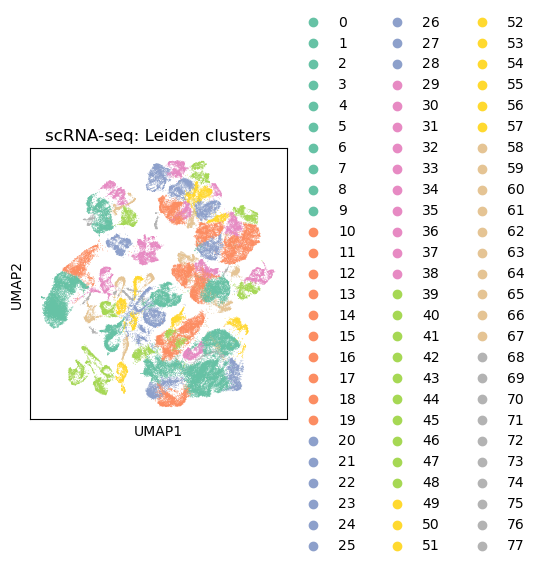

In [6]:
import scanpy as sc
import pandas as pd
#Take only developing PFC
adata = adata[adata.obs["Region"] == "PFC"].copy()
#Remove stale diffmap embeddings
adata.obsm.pop("X_diffmap", None)
adata.uns.pop("diffmap_evals", None)   # safe even if missing
adata.uns.pop("diffmap", None)         # optional: remove other diffmap metadata

sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
sc.tl.leiden(adata, resolution=1.5, key_added="leiden")
sc.tl.umap(adata, random_state=0)
ax = sc.pl.umap(
    adata,
    color="leiden",
    palette="Set2",
    legend_loc="right margin",
    title="scRNA-seq: Leiden clusters",
    show=False
)

import matplotlib.pyplot as plt
# Rasterize only the point cloud(s)
for coll in ax.collections:
    coll.set_rasterized(True)

plt.tight_layout()
ax.set_aspect("equal")
plt.savefig("umap_human_neocortex_scRNAseq_leiden.svg", bbox_inches="tight")
plt.show()


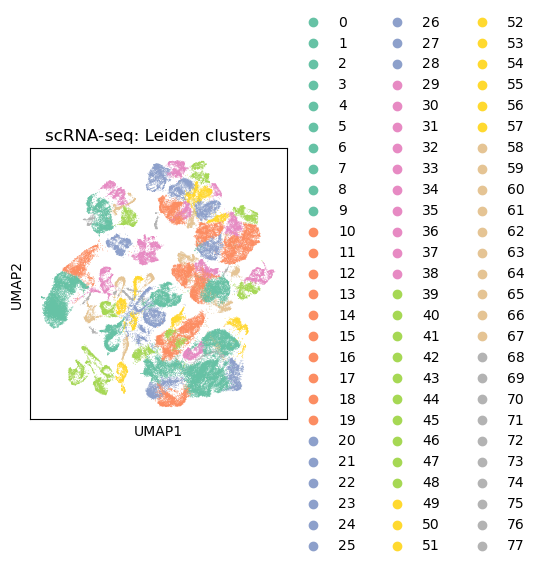

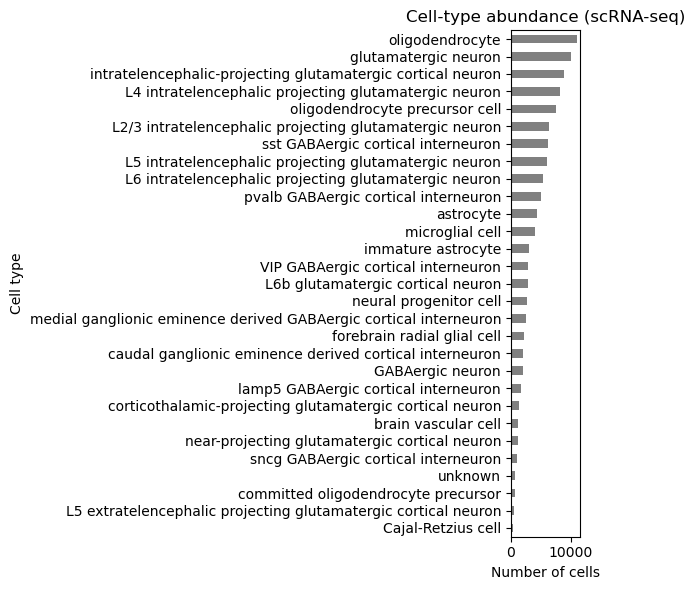

In [ ]:
ct = pd.crosstab(
    adata.obs["cell_type"],
    adata.obs["donor_id"]
)

ct

ax = sc.pl.umap(
    adata,
    color="leiden",
    palette="Set2",
    legend_loc="right margin",
    title="scRNA-seq: Leiden clusters",
    show=False
)

import matplotlib.pyplot as plt
# Rasterize only the point cloud(s)
for coll in ax.collections:
    coll.set_rasterized(True)

plt.tight_layout()
ax.set_aspect("equal")
plt.savefig("umap_retina_scRNAseq_leiden.svg", bbox_inches="tight")
plt.show()

counts = adata.obs["cell_type"].value_counts().sort_values()

plt.figure(figsize=(6, 6))
counts.plot(kind="barh", color="gray")

plt.xlabel("Number of cells")
plt.ylabel("Cell type")
plt.title("Cell-type abundance (scRNA-seq)")

plt.tight_layout()

# ✅ save (SVG recommended for text-heavy plots)
plt.savefig("celltype_abundance_scRNAseq_developing_PFC.svg", bbox_inches="tight")

plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def chao2(ctab_binary, axis=1):
    incidence = np.sum(ctab_binary, axis=axis)

    S_obs = np.sum(incidence > 0)
    Q1 = np.sum(incidence == 1)
    Q2 = np.sum(incidence == 2)

    S_Chao2 = S_obs + (Q1**2) / (2 * Q2) if Q2 > 0 else S_obs

    return S_obs, Q1, Q2, S_Chao2

def plot_chao2_barplot(ctab_binary, name, axis=1):
    S_obs, _, _, S_Chao2 = chao2(ctab_binary, axis=axis)

    values = [S_obs, S_Chao2]
    labels = ["S_obs", "S_Chao2"]

    plt.figure(figsize=(4, 4))

    bars = plt.bar(
        labels,
        values,
        color="gray",
        edgecolor="black"
    )

    plt.ylabel("Estimated richness")
    plt.title(name)

    # Force y-axis to start at 0 and show full range
    ymax = max(values) * 1.15
    plt.ylim(0, ymax)

    # ✅ Add numbers on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(round(height))}",
            ha="center",
            va="bottom"
        )

    plt.tight_layout()
    plt.savefig(f"{name}_chao2_barplot.svg", bbox_inches="tight")
    plt.show()

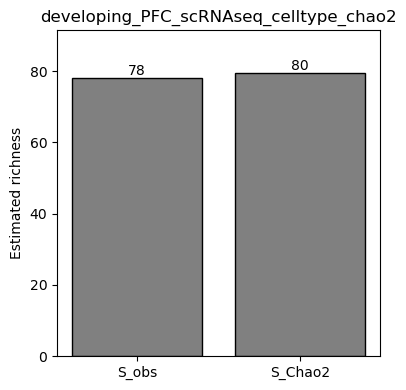

In [10]:
ct = pd.crosstab(
    adata.obs["leiden"],
    adata.obs["donor_id"]
)

ct

ctab_binary = (ct > 0).astype(int)
plot_chao2_barplot(ctab_binary, name="developing_PFC_scRNAseq_celltype_chao2")

In [7]:
# Python/Scanpy translation of the R code (AnnData + pandas/numpy/matplotlib)
# -----------------------------------------------------------------------------
# Requirements:
#   pip install scanpy anndata pandas numpy matplotlib
#
# Assumptions:
#   - You already have an AnnData object `adata`
#   - adata.obs has columns:
#       * 'sample' (sample ID per cell)
#       * 'bbknn_leiden' (cluster label per cell; change if needed)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Helper: Chao2 estimator
# -------------------------------
def calc_chao2(binary_mat: np.ndarray) -> dict:
    """
    binary_mat: 2D array of shape (n_samples, n_clusters) with 0/1 presence/absence
    Returns dict with S_chao2, S_obs, Q1, Q2
    """
    species_counts = binary_mat.sum(axis=0)     # across samples, per cluster
    Q1 = int(np.sum(species_counts == 1))
    Q2 = int(np.sum(species_counts == 2))
    S_obs = int(np.sum(species_counts > 0))
    if Q2 > 0:
        S_chao2 = float(S_obs + (Q1 ** 2) / (2 * Q2))
    else:
        S_chao2 = float(S_obs)
    return {"S_chao2": S_chao2, "S_obs": S_obs, "Q1": Q1, "Q2": Q2}

# -------------------------------
# Main: bootstrap across sample sizes
# -------------------------------
def chao2_stability(
    adata,
    sample_col: str = "sample",
    cluster_col: str = "bbknn_leiden",
    n_boot: int = 500,
    seed: int = 42,
    min_samples: int = 3,
) -> pd.DataFrame:
    """
    Replicates the R workflow:
      For each sample size n_samp, repeatedly subsample samples (without replacement),
      compute presence/absence table sample x cluster, estimate observed clusters and Chao2,
      then summarize mean/sd across bootstraps.
    """
    rng = np.random.default_rng(seed)

    meta = adata.obs[[sample_col, cluster_col]].copy()

    # Optional: drop NA cluster labels to avoid treating NaN as a cluster
    meta = meta.dropna(subset=[cluster_col])

    all_samples = meta[sample_col].unique()
    if len(all_samples) < min_samples:
        raise ValueError(f"Need at least {min_samples} unique samples; found {len(all_samples)}.")

    nsamps = range(min_samples, len(all_samples) + 1)

    rows = []
    for n_samp in nsamps:
        print(f"🔄  Processing sample size {n_samp:2d} / {max(nsamps):2d} …")

        obs_vals = np.empty(n_boot, dtype=float)
        chao2_vals = np.empty(n_boot, dtype=float)

        for b in range(n_boot):
            sel = rng.choice(all_samples, size=n_samp, replace=False)
            submd = meta[meta[sample_col].isin(sel)]

            # Contingency table: sample x cluster
            ctab = pd.crosstab(submd[sample_col], submd[cluster_col])

            # Presence/absence matrix
            binmat = (ctab.values > 0).astype(np.int64)

            ch = calc_chao2(binmat)
            obs_vals[b] = ch["S_obs"]
            chao2_vals[b] = ch["S_chao2"]

        rows.append(
            {
                "sample_size": n_samp,
                "obs_mean": float(np.mean(obs_vals)),
                "obs_sd": float(np.std(obs_vals, ddof=1)),
                "chao2_mean": float(np.mean(chao2_vals)),
                "chao2_sd": float(np.std(chao2_vals, ddof=1)),
            }
        )

    return pd.DataFrame(rows)

# -------------------------------
# Plot (matplotlib) and save SVG
# -------------------------------
def plot_chao2_stability(results: pd.DataFrame, out_svg: str = "Chao2_stability_Yevhen.svg"):
    x = results["sample_size"].to_numpy()

    # Observed clusters
    y_obs = results["obs_mean"].to_numpy()
    y_obs_lo = (results["obs_mean"] - results["obs_sd"]).to_numpy()
    y_obs_hi = (results["obs_mean"] + results["obs_sd"]).to_numpy()

    # Chao2 estimate
    y_chao = results["chao2_mean"].to_numpy()
    y_chao_lo = (results["chao2_mean"] - results["chao2_sd"]).to_numpy()
    y_chao_hi = (results["chao2_mean"] + results["chao2_sd"]).to_numpy()

    fig, ax = plt.subplots(figsize=(8, 5))

    ax.plot(x, y_obs, label="Observed clusters")
    ax.fill_between(x, y_obs_lo, y_obs_hi, alpha=0.2)

    ax.plot(x, y_chao, label="Chao2 estimate")
    ax.fill_between(x, y_chao_lo, y_chao_hi, alpha=0.2)

    ax.set_xlabel("Number of Samples")
    ax.set_ylabel("Number of Clusters")
    ax.set_title("Stability of Chao2 Completeness Estimation")
    ax.legend(loc="upper left")
    ax.grid(False)

    fig.tight_layout()
    fig.savefig(out_svg, format="svg")
    plt.close(fig)

# -------------------------------
# Example usage
# -------------------------------
# results = chao2_stability(adata, sample_col="sample", cluster_col="bbknn_leiden",
#                           n_boot=500, seed=42, min_samples=3)
# plot_chao2_stability(results, out_svg="Chao2_stability_Yevhen.svg")
# results.to_csv("Chao2_stability_Yevhen.csv", index=False)


In [9]:
results = chao2_stability(adata, sample_col="donor_id", cluster_col="cell_type",
                           n_boot=500, seed=42, min_samples=3)
plot_chao2_stability(results, out_svg="Chao2_stability_Yevhen_neocortex_celltype.svg")
results.to_csv("Chao2_stability_Yevhen_neocortex_celltype.csv", index=False)

🔄  Processing sample size  3 / 17 …
🔄  Processing sample size  4 / 17 …
🔄  Processing sample size  5 / 17 …
🔄  Processing sample size  6 / 17 …
🔄  Processing sample size  7 / 17 …
🔄  Processing sample size  8 / 17 …
🔄  Processing sample size  9 / 17 …
🔄  Processing sample size 10 / 17 …
🔄  Processing sample size 11 / 17 …
🔄  Processing sample size 12 / 17 …
🔄  Processing sample size 13 / 17 …
🔄  Processing sample size 14 / 17 …
🔄  Processing sample size 15 / 17 …
🔄  Processing sample size 16 / 17 …
🔄  Processing sample size 17 / 17 …
